<a href="https://colab.research.google.com/github/snemmani/ml_ai/blob/master/Lab/Day2_Cybersecurity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Email Spam detection system



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('spam_ham_dataset.csv', index_col=0)
df.head()

,label,text,label_num
605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
4685,spam,"Subject: photoshop , windows , office . cheap ...",1
2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
df.describe()

,label_num
count,5171.000000
mean,0.289886
std,0.453753
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


from matplotlib import pyplot as plt
_df_0['label_num'].plot(kind='hist', bins=20, title='label_num')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['label_num'].plot(kind='line', figsize=(8, 4), title='label_num')
plt.gca().spines[['top', 'right']].set_visible(False)

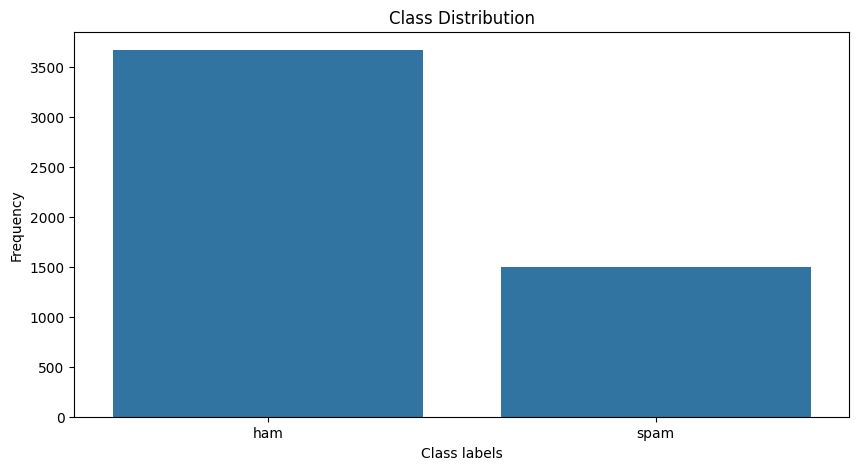

In [6]:
class_counts = df['label'].value_counts()

# Plotting class counts
plt.figure(figsize=(10, 5))
sns.barplot(x = class_counts.index, y=class_counts.values)
plt.title("Class Distribution")
plt.ylabel('Frequency')
plt.xlabel('Class labels')

plt.show()

# Word Frequency

In [7]:
from collections import Counter

df[df['label'] == 'ham']

,label,text,label_num
605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
2949,ham,Subject: ehronline web address change\r\nthis ...,0
...,...,...,...
2849,ham,"Subject: fw : crosstex energy , driscoll ranch...",0
1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0


In [8]:
df[df['label'] == 'ham']['text']

605     Subject: enron methanol ; meter # : 988291\r\n...
2349    Subject: hpl nom for january 9 , 2001\r\n( see...
3624    Subject: neon retreat\r\nho ho ho , we ' re ar...
2030    Subject: re : indian springs\r\nthis deal is t...
2949    Subject: ehronline web address change\r\nthis ...
                              ...                        
2849    Subject: fw : crosstex energy , driscoll ranch...
1518    Subject: put the 10 on the ft\r\nthe transport...
404     Subject: 3 / 4 / 2000 and following noms\r\nhp...
2933    Subject: calpine daily gas nomination\r\n>\r\n...
1409    Subject: industrial worksheets for august 2000...
Name: text, Length: 3672, dtype: object

In [25]:
def get_most_common_words(class_label, num_words, column_name, dataset):
  text = " ".join(message for message in dataset[dataset['label'] == class_label][column_name])
  words = text.lower().split()

  return Counter(words).most_common(num_words)



In [26]:
get_most_common_words("spam", 20, "text", df)

[('.', 19489),
 (',', 11227),
 ('-', 7941),
 ('the', 7254),
 ('/', 5707),
 ('to', 5160),
 ('and', 4903),
 (':', 4612),
 ('of', 4490),
 ('a', 3787),
 ('in', 3129),
 ('=', 3091),
 ('you', 2794),
 ('for', 2523),
 ('!', 2458),
 ('this', 2283),
 ('is', 2256),
 ('your', 1946),
 ('?', 1928),
 ("'", 1762)]

In [27]:
len("this is a spam email")

20

In [31]:
df['text_length'] = df['text'].apply(lambda x : len(x))

df.head()

,label,text,label_num,text_length
605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327
2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414
2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336


In [32]:
df.groupby('label')['text_length'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
ham,3672.0,977.008170,1382.827493,18.0,231.75,530.0,1227.25,32258.0
spam,1499.0,1223.256171,1825.986210,11.0,283.00,576.0,1253.50,22073.0


In [ ]:
import string

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS


ENGLISH_STOP_WORDS

In [34]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
def preprocess_text(text) :
  text = text.lower()

  text = text.translate(str.maketrans('', '', string.punctuation))

  words = text.split()

  words = [word for word in words if word not in ENGLISH_STOP_WORDS]

  text = " ".join(words)

  return text

In [37]:
df["text"].values[0]

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

# Now use the same logic to convert the text below

In [39]:
preprocess_text(df["text"].values[0])

'subject enron methanol meter 988291 follow note gave monday 4 3 00 preliminary flow data provided daren override pop s daily volume presently zero reflect daily activity obtain gas control change needed asap economics purposes'

In [45]:
df['cleaned_text'] = df['text'].apply(preprocess_text)
df.head()

,label,text,label_num,text_length,cleaned_text
605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,subject enron methanol meter 988291 follow not...
2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,subject hpl nom january 9 2001 attached file h...
3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,subject neon retreat ho ho ho wonderful time y...
4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414,subject photoshop windows office cheap main tr...
2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,subject indian springs deal book teco pvr reve...


In [46]:
ham_words = get_most_common_words("ham", 20, "cleaned_text", df)
spam_words = get_most_common_words("spam", 20, "cleaned_text", df)

In [47]:
spam_words

[('subject', 1657),
 ('s', 1316),
 ('3', 1239),
 ('com', 992),
 ('http', 983),
 ('2', 858),
 ('company', 728),
 ('1', 720),
 ('0', 698),
 ('e', 631),
 ('www', 587),
 ('00', 585),
 ('information', 520),
 ('font', 515),
 ('5', 510),
 ('td', 504),
 ('t', 502),
 ('4', 494),
 ('statements', 476),
 ('email', 474)]

In [48]:
ham_words

[('ect', 13897),
 ('hou', 7281),
 ('enron', 6555),
 ('subject', 6403),
 ('2000', 4308),
 ('gas', 2861),
 ('deal', 2789),
 ('com', 2717),
 ('meter', 2459),
 ('cc', 2359),
 ('pm', 2325),
 ('hpl', 2318),
 ('s', 2111),
 ('2001', 2024),
 ('1', 2023),
 ('daren', 1901),
 ('000', 1880),
 ('00', 1819),
 ('10', 1815),
 ('thanks', 1813)]